<a href="https://colab.research.google.com/github/PravyPrerana-1610/Codes/blob/main/Majumdar_paper_RTP_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-505833373.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


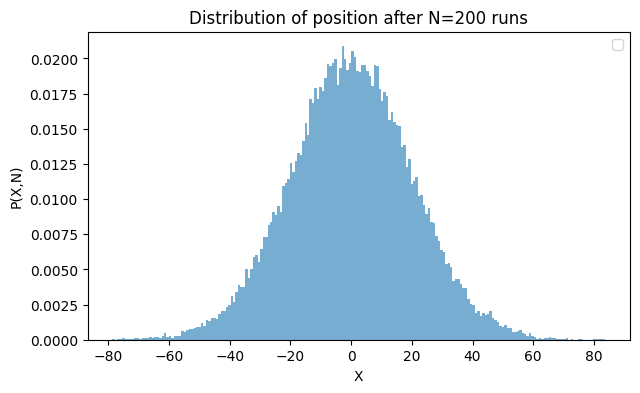

In [12]:
# generate the gaussian curve for Majumdar RTP model
import numpy as np
import matplotlib.pyplot as plt

N_simulations = 50000   # number of simulations considered
N_runs = 200  # number of runs
sigma = 1
gamma = 1
#mean =0 here since its symmetric
# generate velocities and run times for each simukations
v = np.random.normal(0, sigma, size=(N_simulations, N_runs))
tau = np.random.exponential(1/gamma, size=(N_simulations, N_runs))
x_i = v * tau

# total displacement after N_runs
X_N = np.sum(x_i, axis=1)

# histogram plot of X_N (position after N runs)
plt.figure(figsize=(7,4))
plt.hist(X_N, bins=200, density=True, alpha=0.6)

plt.xlabel("X")
plt.ylabel("P(X,N)")
plt.title("Distribution of position after N=200 runs")
plt.legend()
plt.show()


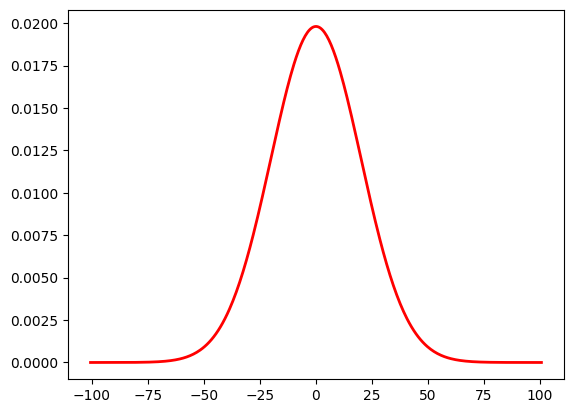

In [14]:
# Gauss fit
mu = np.mean(X_N)
sigma_X = np.std(X_N)
xx = np.linspace(mu - 5*sigma_X, mu + 5*sigma_X, 400)
P_gauss = 1/(np.sqrt(2*np.pi)*sigma_X) * np.exp(-(xx - mu)**2 / (2*sigma_X**2))
plt.plot(xx, P_gauss, 'r', lw=2, label='Gauss fit')

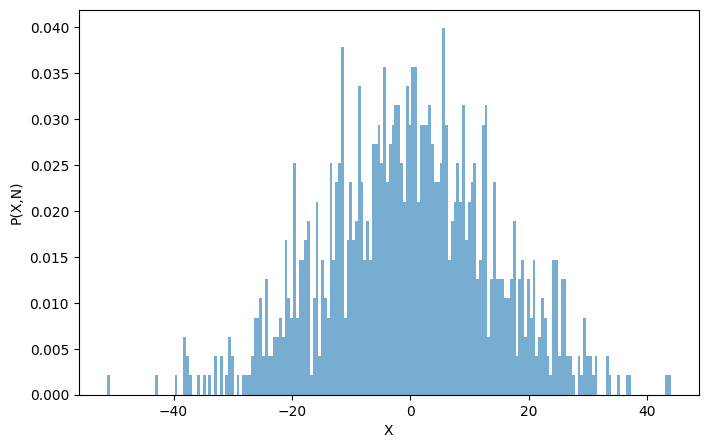

In [18]:
#MCMC algorithm try
import numpy as np
import matplotlib.pyplot as plt
import math
import time
N_runs = 100         # number of runs per particle
N_simulations = 1000  # number of simulated trajectories
sigma = 1.0
gamma = 1.0
# velocities and times for N simulations
v = np.random.normal(0, sigma, size=(N_simulations, N_runs))
tau = np.random.exponential(1/gamma, size=(N_simulations, N_runs))
x_i = v * tau
X_N = np.sum(x_i, axis=1)


plt.figure(figsize=(8,5))
plt.hist(X_N, bins=200, density=True, alpha=0.6)

plt.xlabel("X")
plt.ylabel("P(X,N)")
plt.show()

In [19]:
def compute_tot_disp(v, tau):
    return np.sum(v * tau)

def mcmc_constrained(N, X_star, num_steps=10000, a=0.2, b=0.2):
    '''
    v = np.random.normal(0, sigma, N_runs)
    tau = np.random.exponential(1/gamma, N_runs)
    X = compute_tot_dis(v, tau)'''


    while X < X_star:
        v = np.random.normal(0, sigma, N_runs)
        tau = np.random.exponential(1/gamma, N_runs)
        X = compute_tot_disp(v, tau)

    samples = []
    for step in range(num_steps):
        # update to one velocity and one tau chosen randomly
        i = np.random.randint(0, N_runs)
        j = np.random.randint(0, N_runs)

        v_new = np.copy(v)
        tau_new = np.copy(tau)

        v_new[i] += np.random.normal(0, a)
        tau_new[j] += np.random.normal(0, b)


        X_new = compute_tot_disp(v_new, tau_new)


        if X_new < X_star:
            continue


        p_old = np.exp(-np.sum(v**2)/(2*sigma**2) - np.sum(tau))
        p_new = np.exp(-np.sum(v_new**2)/(2*sigma**2) - np.sum(tau_new))
        acc = min(1.0, p_new/p_old)

        if np.random.rand() < acc:
            v, tau, X = v_new, tau_new, X_new

        if step % 20 == 0:
            samples.append(X)

    return np.array(samples)

1.8520543575286865


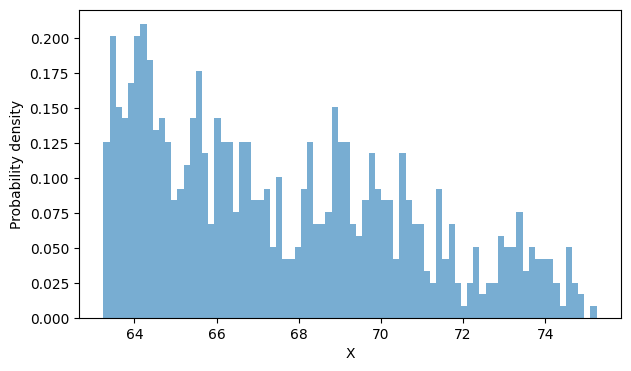

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import math
import time

N_runs= 100
N_simulations = 10000
sigma = 1.0
gamma = 1.0
v = np.random.normal(0, sigma, size=(N_simulations, N_runs))
tau = np.random.exponential(1/gamma, size=(N_simulations, N_runs))
x_i = v * tau
X_N = np.sum(x_i, axis=1)


def compute_total_displacement(v, tau):
    return np.sum(v * tau)

def mcmc_constrained(N, X_star, steps=5000, a=0.2, b=0.2):
    v = np.random.normal(0, sigma, N_runs)
    tau = np.random.exponential(1/gamma, N_runs)
    X = compute_total_displacement(v, tau)

    while X < X_star:
        v = np.random.normal(0, sigma, N_runs)
        tau = np.random.exponential(1/gamma, N_runs)
        X = compute_total_displacement(v, tau)

    samples = []
    for step in range(steps):
        i = np.random.randint(0, N_runs)
        j = np.random.randint(0, N_runs)

        v_new = np.copy(v)
        tau_new = np.copy(tau)
        v_new[i] += np.random.uniform(-a, a)
        tau_new[j] = abs(tau_new[j] + np.random.uniform(-b, b))


        X_new = compute_total_displacement(v_new, tau_new)
        if X_new < X_star:
            continue

        p_old = np.exp(-np.sum(v**2)/(2*sigma**2) - np.sum(tau))
        p_new = np.exp(-np.sum(v_new**2)/(2*sigma**2) - np.sum(tau_new))
        acc = min(1.0, p_new/p_old)

        if np.random.rand() < acc:
            v, tau, X = v_new, tau_new, X_new

        if step % 10 == 0:
            samples.append(X)

    return np.array(samples)

X_star = 2.0 * (N_runs ** 0.75)

start = time.time()
X_samples = mcmc_constrained(N_runs, X_star, steps=8000)
end = time.time()

print(end-start)

plt.figure(figsize=(7,4))
#plt.hist(X_N, bins=80, density=True, alpha=0.5)
plt.hist(X_samples, bins=80, density=True, alpha=0.6)
plt.xlabel("X")
plt.ylabel("Probability density")
plt.show()



36.20387554168701


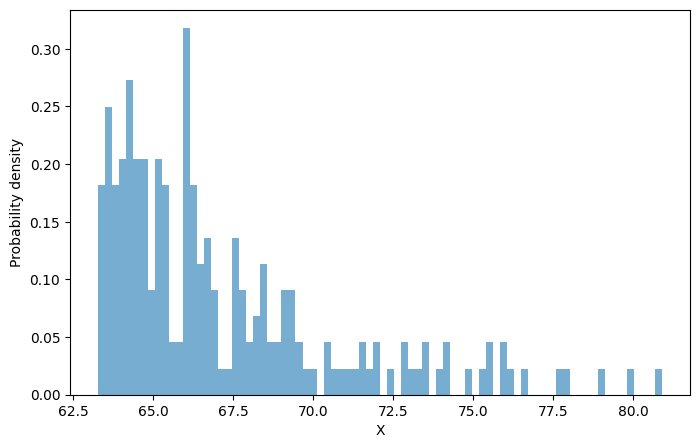

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
N_runs = 100
N_simulations = 10**3
sigma = 1.0
gamma = 1.0
v = np.random.normal(0, sigma, size=(N_simulations, N_runs))
tau = np.random.exponential(1/gamma, size=(N_simulations, N_runs))
x_i = v * tau
X_N = np.sum(x_i, axis=1)
def compute_total_displacement(v, tau):
        return np.sum(v * tau)
def mcmc_rtp_rare(N, X_star, a=0.2, b=0.2, thermal_sweeps=10000, meas_interval=100, num_sweeps_sampling=10000):
    while True:
        v = np.random.normal(0, sigma, N)
        tau = np.random.exponential(1/gamma, N)
        X = compute_total_displacement(v, tau)
        if X > X_star:
            break
    for sweep in range(thermal_sweeps):
        for move in range(N):
            i = np.random.randint(0, N)
            j = np.random.randint(0, N)

            v_new = np.copy(v)
            tau_new = np.copy(tau)
            v_new[i] += np.random.uniform(-a, a)
            tau_new[j] = abs(tau_new[j] + np.random.uniform(-b, b))

            X_new = compute_total_displacement(v_new, tau_new)

            if X_new < X_star:
                continue

            p_old = np.exp(-np.sum(v**2)/(2*sigma**2) - np.sum(tau))
            p_new = np.exp(-np.sum(v_new**2)/(2*sigma**2) - np.sum(tau_new))
            acc = min(1.0, p_new/p_old)

            if np.random.rand() < acc:
                v, tau, X = v_new, tau_new, X_new
    samples = []

    for sweep in range(num_sweeps_sampling):
        for move in range(N):
            i = np.random.randint(0, N)
            j = np.random.randint(0, N)

            v_new = np.copy(v)
            tau_new = np.copy(tau)
            v_new[i] += np.random.uniform(-a, a)
            tau_new[j] = abs(tau_new[j] + np.random.uniform(-b, b))

            X_new = compute_total_displacement(v_new, tau_new)

            if X_new < X_star:
                continue

            p_old = np.exp(-np.sum(v**2)/(2*sigma**2) - np.sum(tau))
            p_new = np.exp(-np.sum(v_new**2)/(2*sigma**2) - np.sum(tau_new))
            acc = min(1.0, p_new/p_old)

            if np.random.rand() < acc:
                v, tau, X = v_new, tau_new, X_new
        if sweep % meas_interval == 0:
            samples.append(X)

    return np.array(samples)

X_star = 2.0 * (N_runs**0.75)
start = time.time()
X_samples = mcmc_rtp_rare( N_runs, X_star, a=0.2, b=0.2,thermal_sweeps=1000,  meas_interval=50, num_sweeps_sampling=10000)
end = time.time()
print(end-start)


plt.figure(figsize=(8,5))

plt.hist(X_samples, bins=80, density=True, alpha=0.6)

plt.xlabel("X")
plt.ylabel("Probability density")

plt.show()
